# Lung Cancer - Classification 

# Table of contents 
 - data wrangling and EDA 
    * Exploreing
    * Data Cleaning
 - Data visualization
 - data pre-prosessing
    * geting dependent and independent
    * handele imblsed classes
    * standardization
 - implement machine learnig algorithems


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

## Loding Dataset 

In [5]:
df= pd.read_csv('Lung Cancer Survey.csv')


In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# data wrangling and EDA 



## Exploreing 

In [5]:
df.shape

(309, 16)

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
#m_info  = more information 
def m_info():
    for i in df.columns:
        print("col name", i)
        print(df[i].value_counts())
        print("*"*50)
m_info()
    

col name GENDER
M    162
F    147
Name: GENDER, dtype: int64
**************************************************
col name AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64
**************************************************
col name SMOKING
2    174
1    135
Name: SMOKING, dtype: int64
**************************************************
col name YELLOW_FINGERS
2    176
1    133
Name: YELLOW_FINGERS, dtype: int64
**************************************************
col name ANXIETY
1    155
2    154
Name: ANXIETY, dtype: int64
**************************************************
col name PEER_PRESSURE
2    155
1    154
Name: PEER_PRESSURE, dtype: int64
******************

## We can infer from the previous , that all data are categorical except for Age 
- ( we will use this list in visualization)


In [8]:
xcategorical = [
    'GENDER',
    'SMOKING',
    'YELLOW_FINGERS',
    'ANXIETY',
    'PEER_PRESSURE',
    'CHRONIC DISEASE',
    'FATIGUE ',
    'ALLERGY ',
    'WHEEZING',
    'ALCOHOL CONSUMING',
    'COUGHING',
    'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY',
    'CHEST PAIN'
]
ycategorical = ['LUNG_CANCER']

## Data Cleaning 

-  check for data tybes 

In [9]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

- cheack for missing data 

In [10]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

 - more checking

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Data visualization

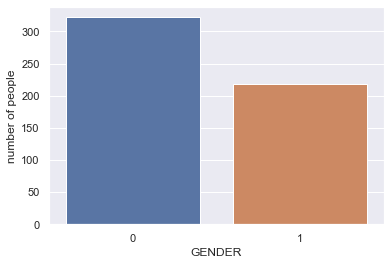

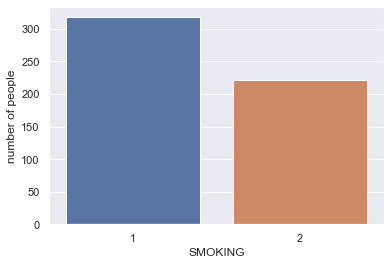

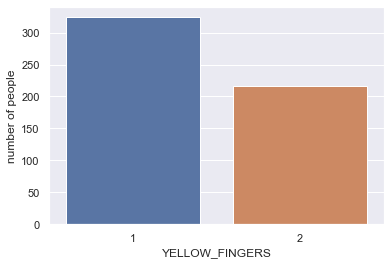

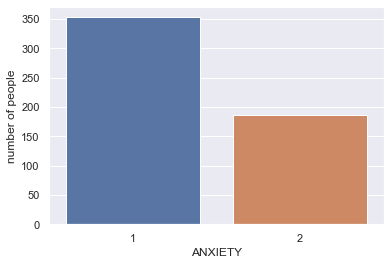

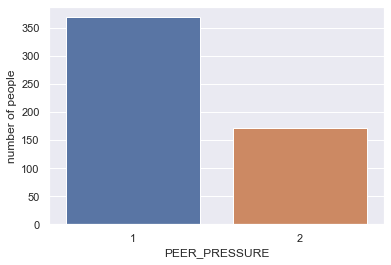

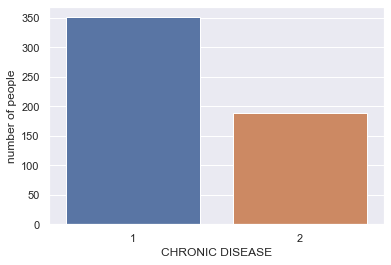

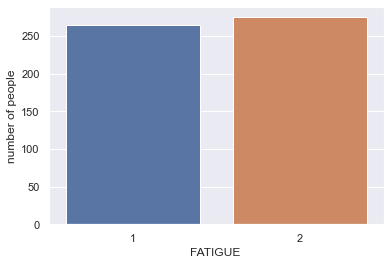

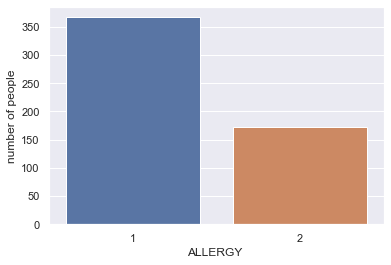

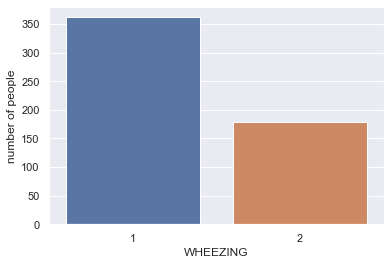

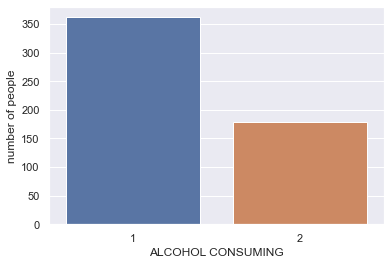

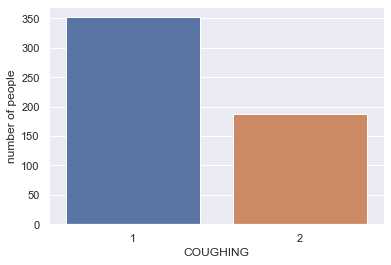

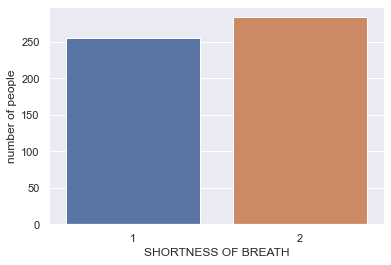

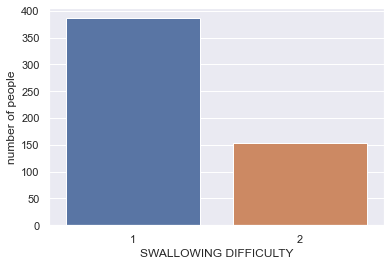

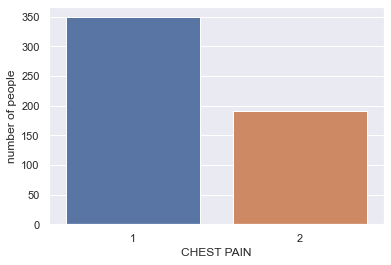

In [25]:
for i in X_res[xcategorical].columns:
    sns.barplot(x=X_res[xcategorical][i].value_counts().index,y=X_res[xcategorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

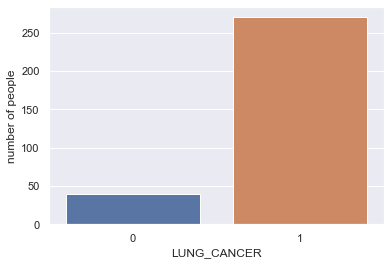

In [28]:
sns.barplot(x=y_res.value_counts().index,y= df['LUNG_CANCER'].value_counts())
plt.xlabel('LUNG_CANCER')
plt.ylabel('number of people')
plt.show()

# data pre-prosessing 

 - to prepare the data for machine learning modeling 

 - geting dependent and independent 

In [10]:
X = df.drop(["LUNG_CANCER"], axis=1)
Y = df["LUNG_CANCER"]

# we got a problem 

In [6]:
df[["GENDER" , "LUNG_CANCER" ]].head()

,GENDER,LUNG_CANCER
0,M,YES
1,M,YES
2,F,NO
3,M,NO
4,F,NO


 - we will use one hot encoding to handel categorical data 

In [9]:
df["GENDER"] = df["GENDER"].map({"F": 0, "M": 1})
df['LUNG_CANCER']= df['LUNG_CANCER'].map({'NO':0, "YES":1})

# we got a problem 


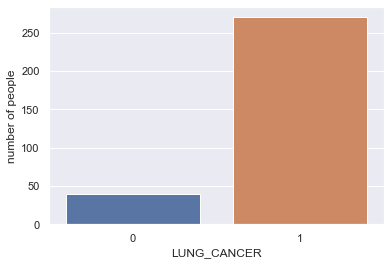

In [13]:
sns.barplot(x=y_res.value_counts().index,y= df['LUNG_CANCER'].value_counts())
plt.xlabel('LUNG_CANCER')
plt.ylabel('number of people')
plt.show()

 - handele imblsed classes 

In [14]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)


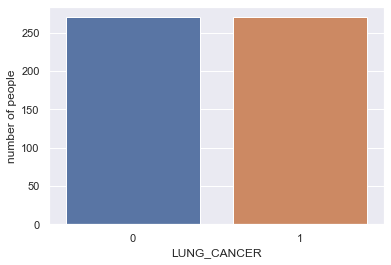

In [15]:
sns.barplot(x=y_res.value_counts().index,y= y_res.value_counts())
plt.xlabel('LUNG_CANCER')
plt.ylabel('number of people')
plt.show()

In [20]:
df.shape 

(309, 16)

In [21]:
X_res.shape

(540, 15)

## feature scaling ( standardization )

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)


## Spltting data into training & test

 - spliting the data into train data teasting data  

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42 ) #test-train data split - 20/80
print("X_train : ",len(X_train))
print("X_test : ",len(X_test))
print("y_test : ",len(y_test))

X_train :  432
X_test :  108
y_test :  108


# Performing Principal component analysis (PCA) 

In [33]:
from sklearn.decomposition import PCA

In [34]:
df_PCA = PCA(n_components =  2)

In [35]:
dfP = df_PCA.fit_transform(X_res)
# dfP is numpy.ndarray


In [16]:
print( "components : ", df_PCA.components_)
print( "explained_varianc :" , df_PCA.explained_variance_)

NameError: name 'df_PCA' is not defined

# implement machine learnig algorithems  


## Importing required sklearn libraries to start implementing the proper ML algorithm

In [38]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Using the Logistic Regression model on dataset

In [39]:

logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
logreg.fit(X_train, y_train)  #X_train de feature lar var y_train de kanser olup olmadığı
y_pred = logreg.predict(X_test)





acc_log_train = round(logreg.score(X_train, y_train)*100,2) #modeli eğittim
acc_log_test = round(logreg.score(X_test,y_test)*100,2) #teste bakıyorum modeli değerlendiriyorum
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 97.22
Test Accuracy: % 95.37


## Confusion Matrix

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[47,  4],
       [ 1, 56]], dtype=int64)

# Using the decision tree algorithm on the data set

In [42]:
#Decision Tree
dt = DecisionTreeClassifier(random_state = 42)
dt_param_grid = {"min_samples_split" : range(10,500,20),
                 "max_depth": range(1,20,2)
                }

#clf = GridSearchCV(dt, param_grid=dt_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose = 1) 
clf = GridSearchCV(dt, param_grid=dt_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1)
clf.fit(X_train,y_train)
y_pred_dt = clf.predict(X_test)
acc_dt_train = round(clf.score(X_train, y_train)*100,2) 
acc_dt_test = round(clf.score(X_test,y_test)*100,2) 
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))


cv_result_dt = clf.best_score_ 
best_estimators_dt = clf.best_estimator_ 
print("Decision Tree Best Score : ", cv_result_dt)
print("Best Estimator : ", best_estimators_dt)

Training Accuracy: % 96.3
Test Accuracy: % 93.52
Decision Tree Best Score :  0.9258456659619452
Best Estimator :  DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)


## Confusion Matrix

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_matrix

array([[49,  2],
       [ 5, 52]], dtype=int64)

# Using the Random Forest algorithm on the data set

In [44]:
#Random Forest
rf = RandomForestClassifier(random_state = 42)
rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],  #en iyiyi bulmak için 100 yapılıyor genelde
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]
             }


clf = GridSearchCV(rf, param_grid=rf_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1)
clf.fit(X_train,y_train)
y_pred_rf = clf.predict(X_test)
acc_rf_train = round(clf.score(X_train, y_train)*100,2)
acc_rf_test = round(clf.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

cv_result_rf = clf.best_score_ 
best_estimators_rf = clf.best_estimator_ 
print("Random Forest Best Score : ", cv_result_rf)
print("Best Estimators : ", best_estimators_rf)

Training Accuracy: % 97.45
Test Accuracy: % 94.44
Random Forest Best Score :  0.9698202959830867
Best Estimators :  RandomForestClassifier(bootstrap=False, max_features=1, min_samples_leaf=3,
                       n_estimators=300, random_state=42)


# thank you 